In [4]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandasql as ps

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Step -2
#Load the data
bsdata=pd.read_csv(r"C:\Users\Praveen\Desktop\Brain stroke Disease\full_data.csv",header=0)
#Step -3
#Copy to back_up file
bsdata_bk=bsdata.copy()
#Display first 5 records
bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
#Step -4
#Display the data set information
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
bsdata.stroke.value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [8]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

stroke_count = bsdata.stroke.value_counts()
print("proportion: ",stroke_count[0]/stroke_count[1],":1")

proportion:  19.08467741935484 :1


In [9]:
#Step -5
#Display the unique values of the data set
bsdata.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [10]:
# Count the missig values by each variable, if available
bsdata.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#Step -6
#Check the duplicate  values with in  dataset if available
bsdata_dup=bsdata[bsdata.duplicated(keep='last')]
bsdata_dup

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [12]:
#Step 7
# plotting histogram for the target variable.

#sns.histplot(bsdata['stroke'],kde=True)

In [13]:
'''
Based on analysis:-
1) ## Females are more likely to get a stroke than male.
2) ### People who are employed in the private sector are more likely to get a stroke.
3) There is no clear relation between heart diseases and hypertension with stroke.
4) Smoking is not a conclusive evidence to determine stroke.
5) ### People who are obese,overweight are more likely to get a stroke.
6) ## People with low glucose level are likely to get a stroke.
7) ## Senior and super senior citizens are more likely to get a stroke.
8) Marriage doesn't determine stroke.

'''

"\nBased on analysis:-\n1) ## Females are more likely to get a stroke than male.\n2) ### People who are employed in the private sector are more likely to get a stroke.\n3) There is no clear relation between heart diseases and hypertension with stroke.\n4) Smoking is not a conclusive evidence to determine stroke.\n5) ### People who are obese,overweight are more likely to get a stroke.\n6) ## People with low glucose level are likely to get a stroke.\n7) ## Senior and super senior citizens are more likely to get a stroke.\n8) Marriage doesn't determine stroke.\n\n"

<Axes: xlabel='stroke', ylabel='Count'>

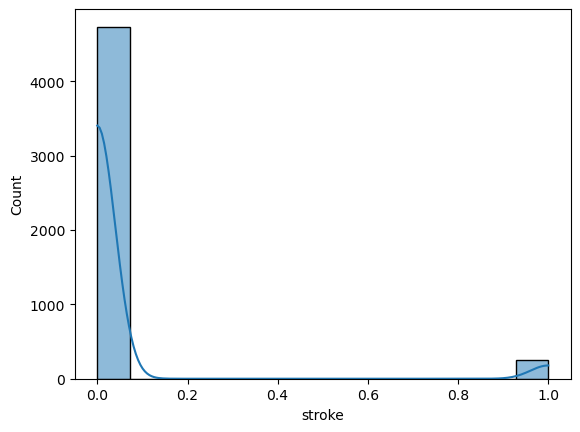

In [85]:
#Step 7
# plotting histogram for the target variable.
sns.histplot(bsdata['stroke'],kde=True)

In [14]:
#Display the unique values by count for 'gender'
bsdata['gender'].value_counts()

gender
Female    2907
Male      2074
Name: count, dtype: int64

In [15]:
#Display the unique values by count for 'work_type'
bsdata['work_type'].value_counts()

work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64

In [63]:
#Display the unique values by count for 'ever_married'
bsdata['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [16]:
#Display the unique values by count for 'Residence_type'
bsdata['Residence_type'].value_counts()

Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64

In [17]:
#Display the unique values by count for 'smoking_status'
bsdata['smoking_status'].value_counts()

smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64

In [18]:
#Step -8,9
#use LabelEncoder for target variable
object_col = ["gender", "ever_married", "Residence_type","smoking_status","work_type"]
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in object_col:
    bsdata[col] = LE.fit_transform(bsdata[col])

In [19]:
bsdata['gender'].value_counts()

gender
0    2907
1    2074
Name: count, dtype: int64

In [20]:
bsdata['ever_married'].value_counts()

ever_married
1    3280
0    1701
Name: count, dtype: int64

In [21]:
bsdata['Residence_type'].value_counts()

Residence_type
1    2532
0    2449
Name: count, dtype: int64

In [22]:
bsdata['smoking_status'].value_counts()

smoking_status
2    1838
0    1500
1     867
3     776
Name: count, dtype: int64

In [23]:
bsdata['work_type'].value_counts()

work_type
1    2860
2     804
3     673
0     644
Name: count, dtype: int64

In [24]:
#Display the data set information
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   int32  
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int32  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 330.9 KB


In [25]:
cols=['age','work_type','avg_glucose_level','bmi','smoking_status','stroke']
bs=bsdata[cols]
bs.corr()

,age,work_type,avg_glucose_level,bmi,smoking_status,stroke
age,1.000000,-0.415935,0.236763,0.373703,0.265623,0.246478
work_type,-0.415935,1.000000,-0.059658,-0.382418,-0.356738,-0.041835
avg_glucose_level,0.236763,-0.059658,1.000000,0.186348,0.064089,0.133227
bmi,0.373703,-0.382418,0.186348,1.000000,0.243111,0.056926
smoking_status,0.265623,-0.356738,0.064089,0.243111,1.000000,0.027463
stroke,0.246478,-0.041835,0.133227,0.056926,0.027463,1.000000


In [26]:
#Display the dataset
bsdata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [27]:
# Display descriptive statistics
bsdata.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


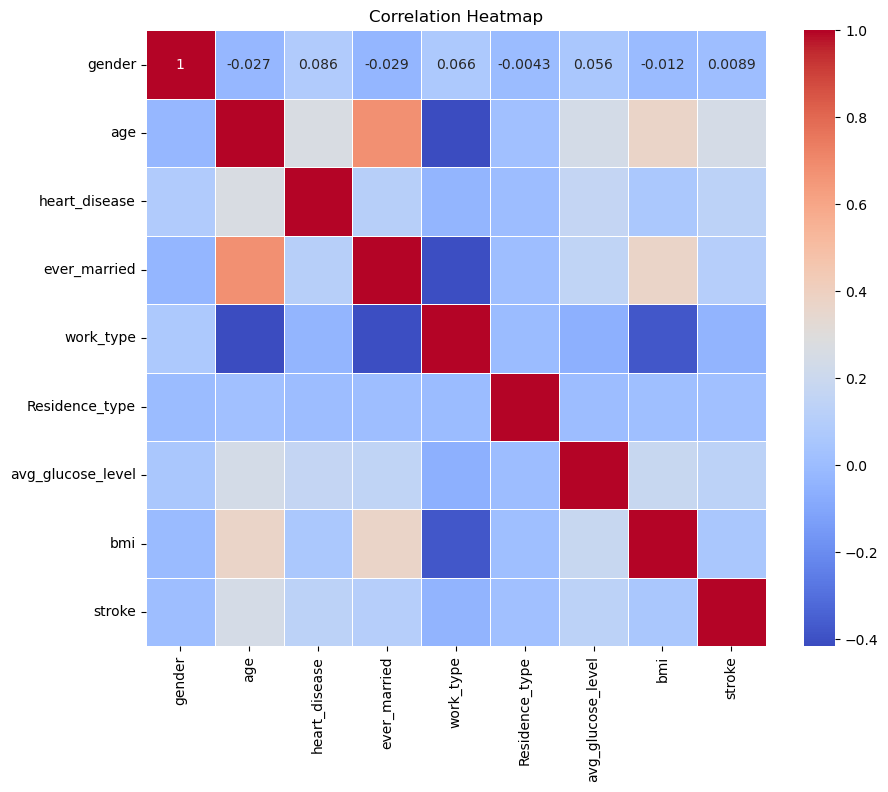

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Specify the target variable and independent variables
target_variable = 'stroke' # Replace with the actual target variable name
independent_variables = ['gender', 'age', 'heart_disease', 'ever_married', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi']  # Replace with the actual independent variable names

# Calculate the correlation matrix
correlation_matrix = bsdata[independent_variables + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


In [28]:
# Finding Correlation Between Target and Remaining Variables
bsdata.corrwith(bsdata['stroke'])

gender               0.008870
age                  0.246478
hypertension         0.131965
heart_disease        0.134610
ever_married         0.108398
work_type           -0.041835
Residence_type       0.016494
avg_glucose_level    0.133227
bmi                  0.056926
smoking_status       0.027463
stroke               1.000000
dtype: float64

In [77]:
#have very low correlation with the target variable so dropping them
#dropping the columns
#badata = bsdata.drop(['gender','work_type','Residence_type','bmi','smoking_status'],axis=1)

In [29]:
#Identify the variables to normalize with minmaxscalar
cols=['age','gender','hypertension','ever_married','heart_disease','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

In [30]:
#Step -10
# identify the Independent and Target (dependent variables)
IndepVar = []
for col in bsdata.columns:
    if col != 'stroke':
        IndepVar.append(col)
TargetVar = 'stroke'
x = bsdata[IndepVar]
y = bsdata[TargetVar]

In [31]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)

print(y_over.shape)

(5324, 10)
(5324,)


In [32]:
#Step -11
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3726, 10), (1598, 10), (3726,), (1598,))

In [33]:
#Step -12
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)


In [34]:
stroke_count = y_train.value_counts()
print("proportion: ",stroke_count[0]/stroke_count[1],":1")

proportion:  8.315 :1


In [47]:
#Load the result file for SVM
SVMResults=pd.read_csv(r"C:\Users\Praveen\Desktop\Brain stroke Disease\EMResults.csv",header=0)
#Display the  first five records
SVMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM- Linear Kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[   0  191]
 [   0 1407]]
Outcome values : 
 0 191 0 1407
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       191
           0       0.88      1.00      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.44      0.50      0.47      1598
weighted avg       0.78      0.88      0.82      1598

Accuracy : 88.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


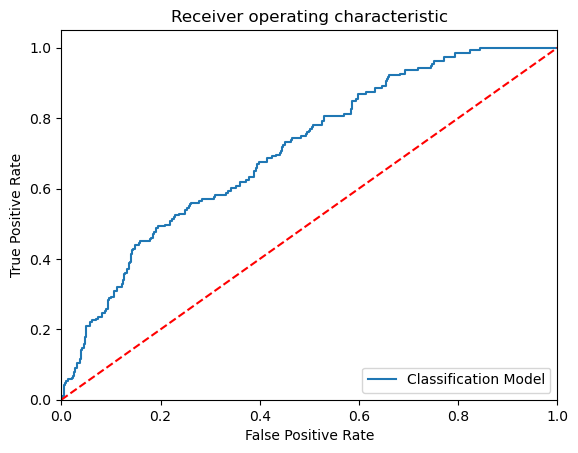

In [48]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}

new_row_df = pd.DataFrame([new_row])
# Concatenate the new row with the existing DataFrame
SVMResults = pd.concat([SVMResults, new_row_df], ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# Polynomial Kernel

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[   0  191]
 [   0 1407]]
Outcome values : 
 0 191 0 1407
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       191
           0       0.88      1.00      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.44      0.50      0.47      1598
weighted avg       0.78      0.88      0.82      1598

Accuracy : 88.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


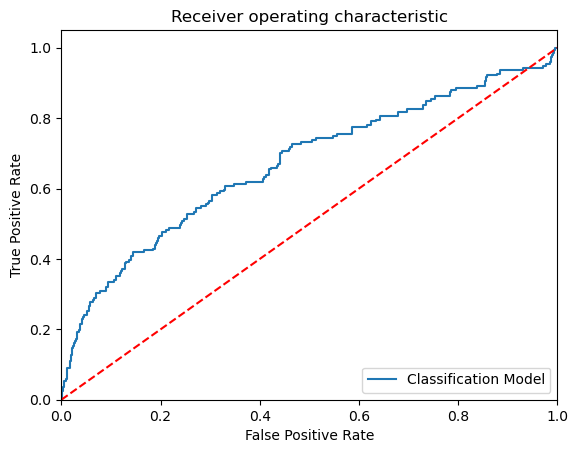

In [49]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Polynomial",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
new_row_df = pd.DataFrame([new_row])
# Concatenate the new row with the existing DataFrame
SVMResults = pd.concat([SVMResults, new_row_df], ignore_index=True)

#-----------------------------------------------------------------------------------------------------------

# Gaussian Kernel

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 162   29]
 [ 361 1046]]
Outcome values : 
 162 29 361 1046
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.85      0.45       191
           0       0.97      0.74      0.84      1407

    accuracy                           0.76      1598
   macro avg       0.64      0.80      0.65      1598
weighted avg       0.89      0.76      0.80      1598

Accuracy : 75.6 %
Precision : 31.0 %
Recall : 84.8 %
F1 Score : 0.454
Specificity or True Negative Rate : 74.3 %
Balanced Accuracy : 79.6 %
MCC : 0.409
roc_auc_score: 0.796


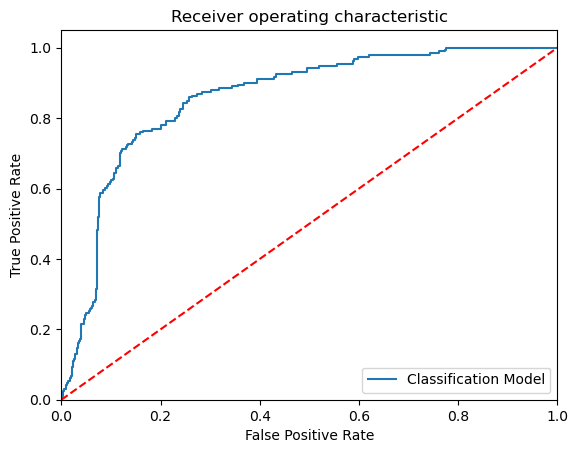

In [50]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}

new_row_df = pd.DataFrame([new_row])
# Concatenate the new row with the existing DataFrame
SVMResults = pd.concat([SVMResults, new_row_df], ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# Sigmoid Kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 86 105]
 [810 597]]
Outcome values : 
 86 105 810 597
Classification report : 
               precision    recall  f1-score   support

           1       0.10      0.45      0.16       191
           0       0.85      0.42      0.57      1407

    accuracy                           0.43      1598
   macro avg       0.47      0.44      0.36      1598
weighted avg       0.76      0.43      0.52      1598

Accuracy : 42.7 %
Precision : 9.6 %
Recall : 45.0 %
F1 Score : 0.158
Specificity or True Negative Rate : 42.4 %
Balanced Accuracy : 43.7 %
MCC : -0.082
roc_auc_score: 0.437


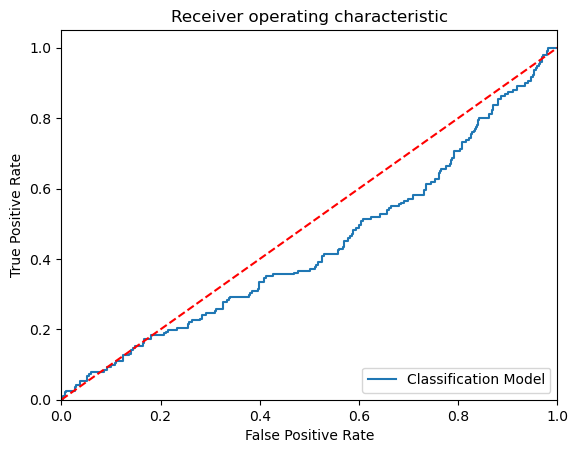

In [51]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}

new_row_df = pd.DataFrame([new_row])
# Concatenate the new row with the existing DataFrame
SVMResults = pd.concat([SVMResults, new_row_df], ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [52]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,191,0,1407,0.880,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynomial,0,191,0,1407,0.880,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,SVM - Gaussian,162,29,361,1046,0.756,0.310,0.848,0.454,0.743,0.409,0.795797,0.796
3,SVM - Sigmoid,86,105,810,597,0.427,0.096,0.450,0.158,0.424,-0.082,0.437284,0.437


In [53]:
#Load the result file for KNN
KNNResults=pd.read_csv(r"C:\Users\Praveen\Desktop\Brain stroke Disease\KNN_Results.csv",header=0)
#Display the  first five records
KNNResults.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 152   39]
 [  73 1334]]
Outcome values : 
 152 39 73 1334
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.80      0.73       191
           0       0.97      0.95      0.96      1407

    accuracy                           0.93      1598
   macro avg       0.82      0.87      0.85      1598
weighted avg       0.94      0.93      0.93      1598

Accuracy : 93.0 %
Precision : 67.6 %
Recall : 79.6 %
F1 Score : 0.731
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 87.2 %
MCC : 0.694
roc_auc_score: 0.872


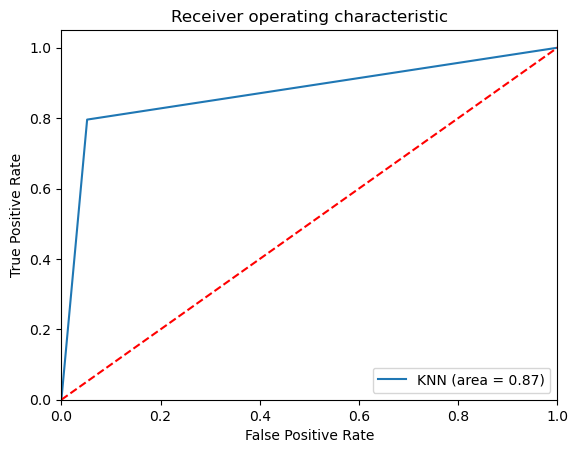

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  91  100]
 [  42 1365]]
Outcome values : 
 91 100 42 1365
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.48      0.56       191
           0       0.93      0.97      0.95      1407

    accuracy                           0.91      1598
   macro avg       0.81      0.72      0.76      1598
weighted avg       0.90      0.91      0.90      1598

Accuracy : 91.1 %
Precision : 68.4 %
Recall : 47.6 %
F1 Score : 0.562
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 72.3 %
MCC : 0.524
roc_auc_score: 0.723


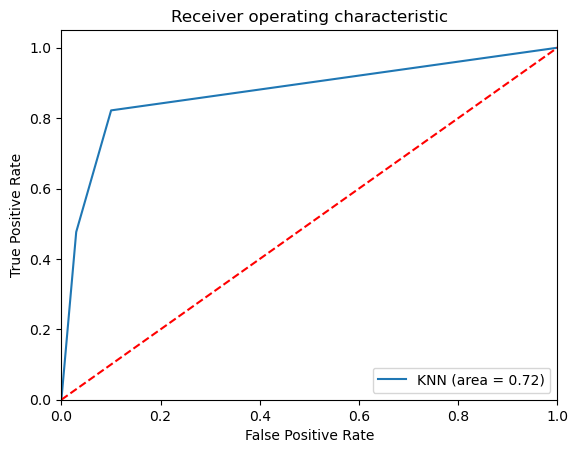

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 103   88]
 [  84 1323]]
Outcome values : 
 103 88 84 1323
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.54      0.54       191
           0       0.94      0.94      0.94      1407

    accuracy                           0.89      1598
   macro avg       0.74      0.74      0.74      1598
weighted avg       0.89      0.89      0.89      1598

Accuracy : 89.2 %
Precision : 55.1 %
Recall : 53.9 %
F1 Score : 0.545
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 74.0 %
MCC : 0.484
roc_auc_score: 0.74


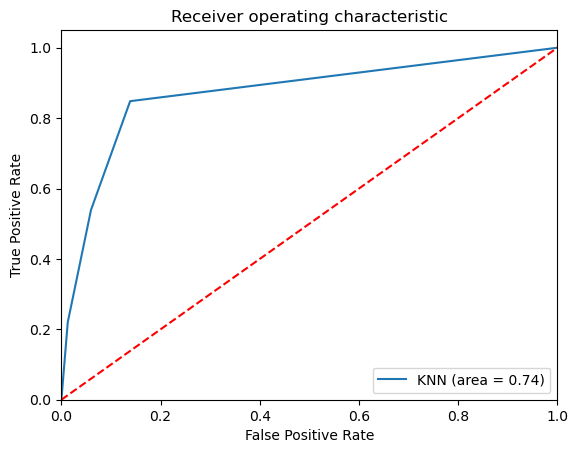

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  61  130]
 [  40 1367]]
Outcome values : 
 61 130 40 1367
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.32      0.42       191
           0       0.91      0.97      0.94      1407

    accuracy                           0.89      1598
   macro avg       0.76      0.65      0.68      1598
weighted avg       0.88      0.89      0.88      1598

Accuracy : 89.4 %
Precision : 60.4 %
Recall : 31.9 %
F1 Score : 0.418
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 64.6 %
MCC : 0.388
roc_auc_score: 0.645


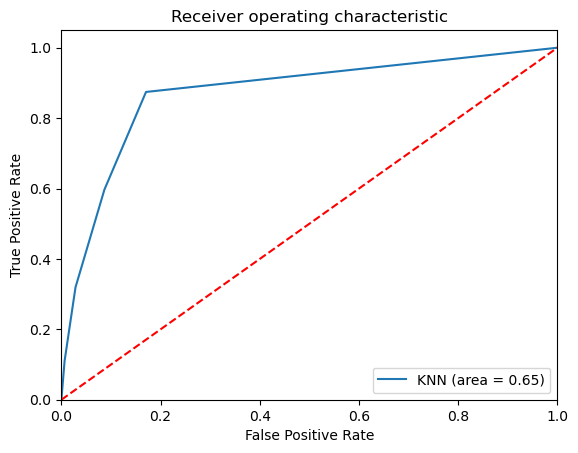

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  79  112]
 [  65 1342]]
Outcome values : 
 79 112 65 1342
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.41      0.47       191
           0       0.92      0.95      0.94      1407

    accuracy                           0.89      1598
   macro avg       0.74      0.68      0.70      1598
weighted avg       0.88      0.89      0.88      1598

Accuracy : 88.9 %
Precision : 54.9 %
Recall : 41.4 %
F1 Score : 0.472
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 68.4 %
MCC : 0.416
roc_auc_score: 0.684


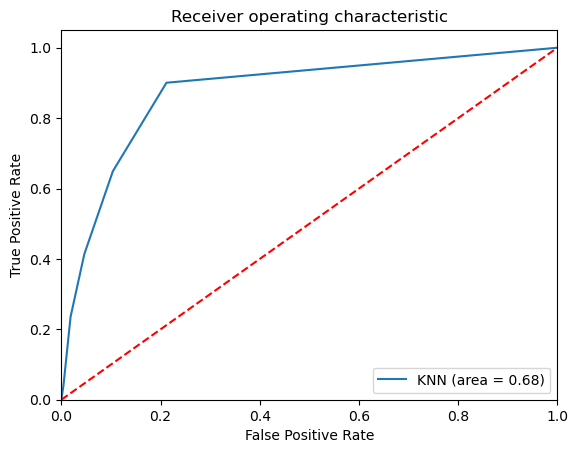

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  60  131]
 [  45 1362]]
Outcome values : 
 60 131 45 1362
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.31      0.41       191
           0       0.91      0.97      0.94      1407

    accuracy                           0.89      1598
   macro avg       0.74      0.64      0.67      1598
weighted avg       0.87      0.89      0.88      1598

Accuracy : 89.0 %
Precision : 57.1 %
Recall : 31.4 %
F1 Score : 0.405
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 64.1 %
MCC : 0.369
roc_auc_score: 0.641


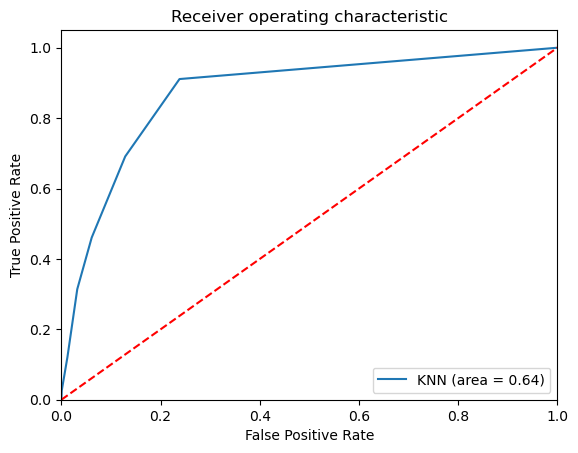

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  65  126]
 [  60 1347]]
Outcome values : 
 65 126 60 1347
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.34      0.41       191
           0       0.91      0.96      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.72      0.65      0.67      1598
weighted avg       0.87      0.88      0.87      1598

Accuracy : 88.4 %
Precision : 52.0 %
Recall : 34.0 %
F1 Score : 0.411
Specificity or True Negative Rate : 95.7 %
Balanced Accuracy : 64.8 %
MCC : 0.36
roc_auc_score: 0.649


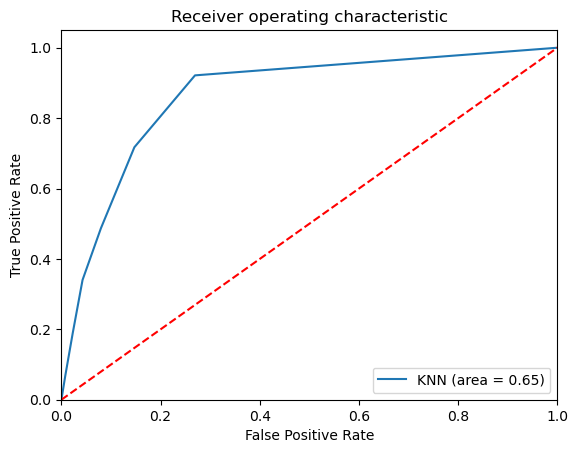

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  38  153]
 [  44 1363]]
Outcome values : 
 38 153 44 1363
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.20      0.28       191
           0       0.90      0.97      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.68      0.58      0.61      1598
weighted avg       0.85      0.88      0.85      1598

Accuracy : 87.7 %
Precision : 46.3 %
Recall : 19.9 %
F1 Score : 0.278
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 58.4 %
MCC : 0.247
roc_auc_score: 0.584


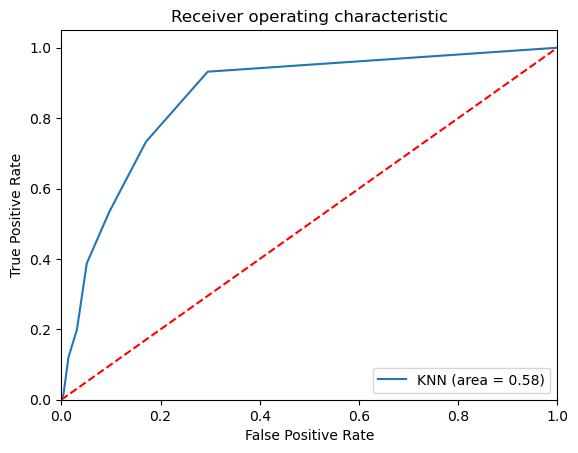

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  50  141]
 [  55 1352]]
Outcome values : 
 50 141 55 1352
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.26      0.34       191
           0       0.91      0.96      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.69      0.61      0.64      1598
weighted avg       0.85      0.88      0.86      1598

Accuracy : 87.7 %
Precision : 47.6 %
Recall : 26.2 %
F1 Score : 0.338
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 61.1 %
MCC : 0.292
roc_auc_score: 0.611


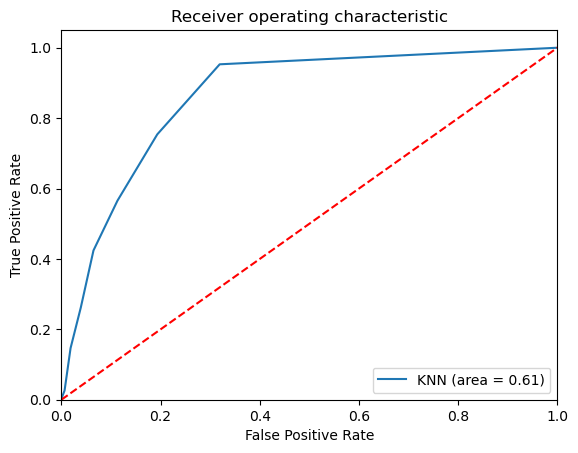

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[  32  159]
 [  34 1373]]
Outcome values : 
 32 159 34 1373
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.17      0.25       191
           0       0.90      0.98      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.69      0.57      0.59      1598
weighted avg       0.85      0.88      0.85      1598

Accuracy : 87.9 %
Precision : 48.5 %
Recall : 16.8 %
F1 Score : 0.249
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 57.2 %
MCC : 0.234
roc_auc_score: 0.572


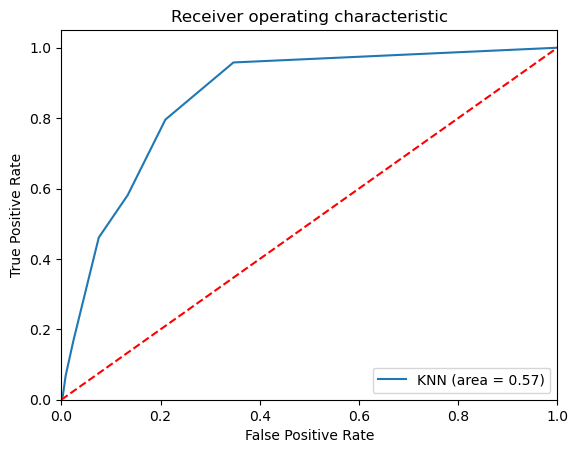

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[  44  147]
 [  48 1359]]
Outcome values : 
 44 147 48 1359
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.23      0.31       191
           0       0.90      0.97      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.69      0.60      0.62      1598
weighted avg       0.85      0.88      0.86      1598

Accuracy : 87.8 %
Precision : 47.8 %
Recall : 23.0 %
F1 Score : 0.311
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 59.8 %
MCC : 0.273
roc_auc_score: 0.598


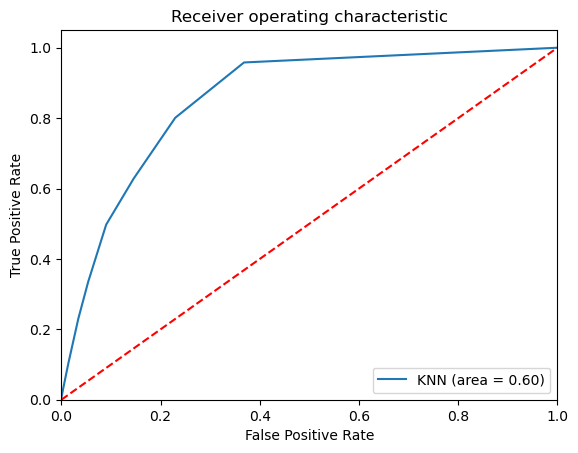

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[  28  163]
 [  27 1380]]
Outcome values : 
 28 163 27 1380
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.15      0.23       191
           0       0.89      0.98      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.70      0.56      0.58      1598
weighted avg       0.85      0.88      0.85      1598

Accuracy : 88.1 %
Precision : 50.9 %
Recall : 14.7 %
F1 Score : 0.228
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 56.4 %
MCC : 0.227
roc_auc_score: 0.564


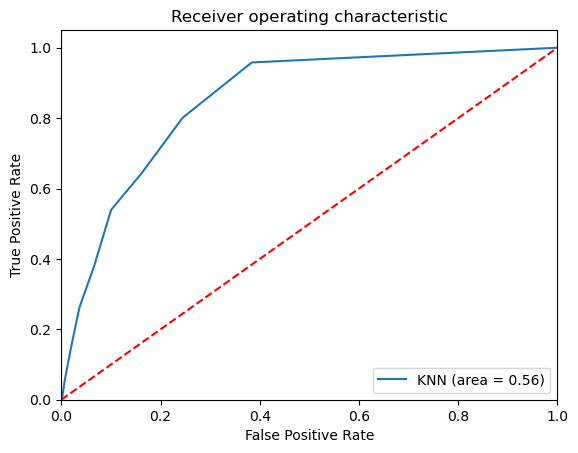

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  30  161]
 [  32 1375]]
Outcome values : 
 30 161 32 1375
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.16      0.24       191
           0       0.90      0.98      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.69      0.57      0.59      1598
weighted avg       0.85      0.88      0.85      1598

Accuracy : 87.9 %
Precision : 48.4 %
Recall : 15.7 %
F1 Score : 0.237
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 56.7 %
MCC : 0.226
roc_auc_score: 0.567


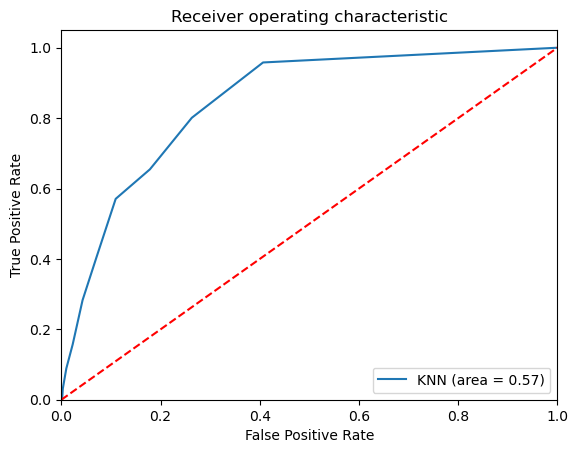

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[  19  172]
 [  20 1387]]
Outcome values : 
 19 172 20 1387
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.10      0.17       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.69      0.54      0.55      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 88.0 %
Precision : 48.7 %
Recall : 9.9 %
F1 Score : 0.165
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 54.2 %
MCC : 0.179
roc_auc_score: 0.543


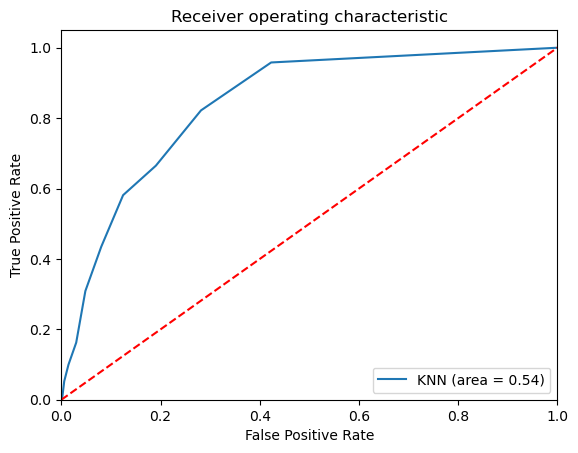

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[  20  171]
 [  26 1381]]
Outcome values : 
 20 171 26 1381
Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.10      0.17       191
           0       0.89      0.98      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.66      0.54      0.55      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 87.7 %
Precision : 43.5 %
Recall : 10.5 %
F1 Score : 0.169
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 54.4 %
MCC : 0.167
roc_auc_score: 0.543


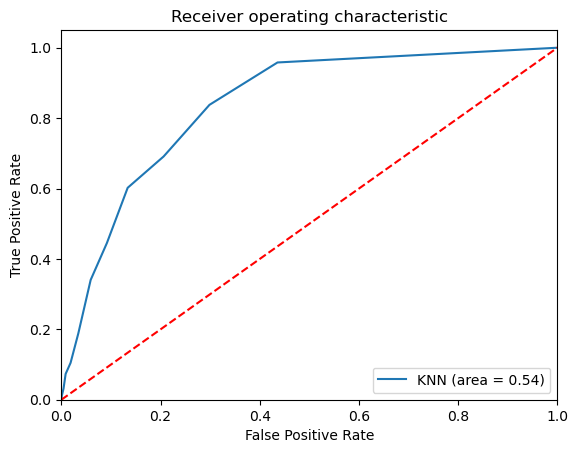

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[  15  176]
 [  17 1390]]
Outcome values : 
 15 176 17 1390
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.08      0.13       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.68      0.53      0.53      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 87.9 %
Precision : 46.9 %
Recall : 7.9 %
F1 Score : 0.135
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 53.4 %
MCC : 0.154
roc_auc_score: 0.533


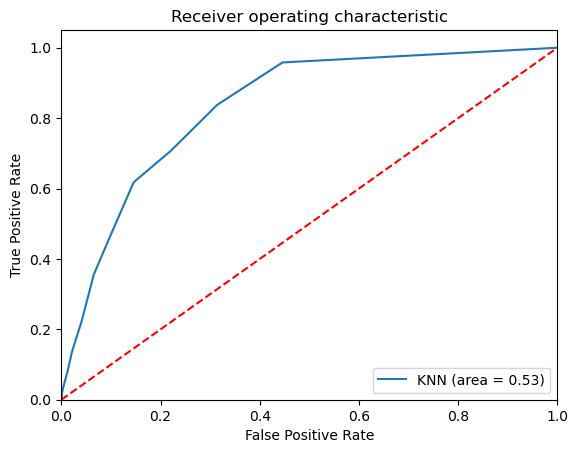

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[  16  175]
 [  19 1388]]
Outcome values : 
 16 175 19 1388
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.08      0.14       191
           0       0.89      0.99      0.93      1407

    accuracy                           0.88      1598
   macro avg       0.67      0.54      0.54      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 87.9 %
Precision : 45.7 %
Recall : 8.4 %
F1 Score : 0.142
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 53.5 %
MCC : 0.156
roc_auc_score: 0.535


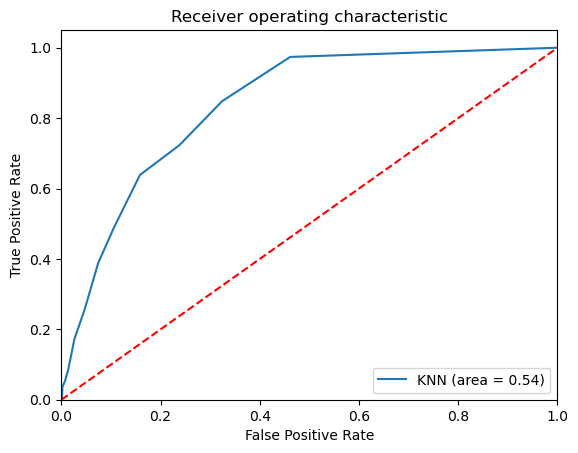

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[  10  181]
 [  12 1395]]
Outcome values : 
 10 181 12 1395
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.05      0.09       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.67      0.52      0.51      1598
weighted avg       0.83      0.88      0.83      1598

Accuracy : 87.9 %
Precision : 45.5 %
Recall : 5.2 %
F1 Score : 0.094
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 52.2 %
MCC : 0.122
roc_auc_score: 0.522


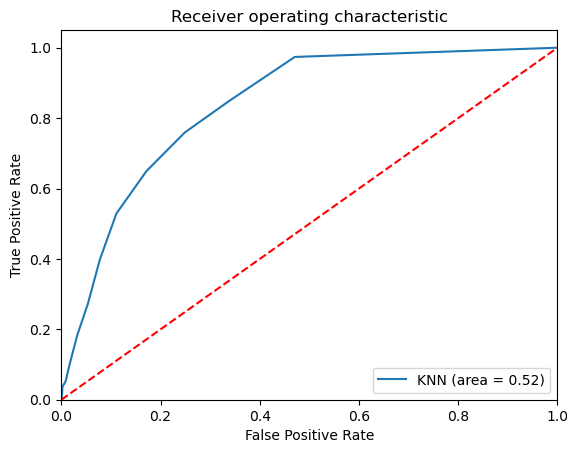

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[  12  179]
 [  13 1394]]
Outcome values : 
 12 179 13 1394
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.06      0.11       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.68      0.53      0.52      1598
weighted avg       0.84      0.88      0.84      1598

Accuracy : 88.0 %
Precision : 48.0 %
Recall : 6.3 %
F1 Score : 0.111
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 52.7 %
MCC : 0.14
roc_auc_score: 0.527


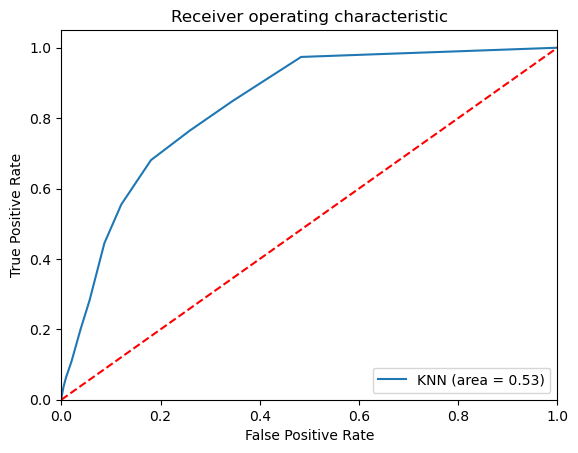

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[   9  182]
 [   7 1400]]
Outcome values : 
 9 182 7 1400
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.05      0.09       191
           0       0.88      1.00      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.72      0.52      0.51      1598
weighted avg       0.85      0.88      0.84      1598

Accuracy : 88.2 %
Precision : 56.2 %
Recall : 4.7 %
F1 Score : 0.087
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 52.1 %
MCC : 0.137
roc_auc_score: 0.521


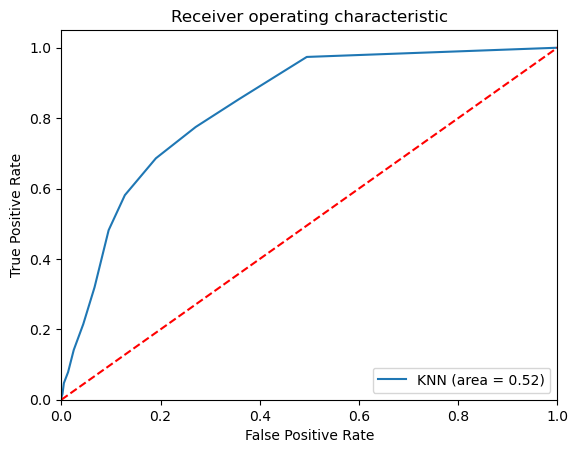

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from math import sqrt

# Initialize KNNResults DataFrame
KNNResults = pd.DataFrame(columns=['Model Name', 'KNN K Value', 'True_Positive', 'False_Negative', 'False_Positive', 'True_Negative', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'MCC', 'ROC_AUC_Score', 'Balanced Accuracy'])

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    print('Model Name: ', ModelKNN)
    
    # confusion matrix
    matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    print('Confusion matrix : \n', matrix)
    
    # outcome values
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report
    C_Report = classification_report(y_test, y_pred, labels=[1,0])
    print('Classification report : \n', C_Report)
    
    # calculating metrics
    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)
    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp + fn)), 3)
    
    # Matthews Correlation Coefficient (MCC)
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2), '%')
    print('Precision :', round(precision*100, 2), '%')
    print('Recall :', round(sensitivity*100, 2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100, 2), '%')
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
    print('MCC :', MCC)
    
    # Area under ROC curve
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print('roc_auc_score:', round(model_roc_auc, 3))
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Create DataFrame from the new_row dictionary
    new_row = {'Model Name': ModelKNN,
               'KNN K Value': a,
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': sensitivity,
               'F1 Score': f1Score,
               'Specificity': specificity,
               'MCC': MCC,
               'ROC_AUC_Score': model_roc_auc,
               'Balanced Accuracy': balanced_accuracy}
    
    new_row_df = pd.DataFrame([new_row])
    
    # Concatenate the new row with the existing DataFrame
    KNNResults = pd.concat([KNNResults, new_row_df], ignore_index=True)


In [58]:
#Display the results of KNN Algorithm
KNNResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,152,39,73,1334,0.930,0.676,0.796,0.731,0.948,0.694,0.871964,0.872
1,KNeighborsClassifier(n_neighbors=2),2,91,100,42,1365,0.911,0.684,0.476,0.562,0.970,0.524,0.723295,0.723
2,KNeighborsClassifier(n_neighbors=3),3,103,88,84,1323,0.892,0.551,0.539,0.545,0.940,0.484,0.739783,0.740
3,KNeighborsClassifier(n_neighbors=4),4,61,130,40,1367,0.894,0.604,0.319,0.418,0.972,0.388,0.645471,0.646
4,KNeighborsClassifier(),5,79,112,65,1342,0.889,0.549,0.414,0.472,0.954,0.416,0.683707,0.684
5,KNeighborsClassifier(n_neighbors=6),6,60,131,45,1362,0.890,0.571,0.314,0.405,0.968,0.369,0.641077,0.641
6,KNeighborsClassifier(n_neighbors=7),7,65,126,60,1347,0.884,0.520,0.340,0.411,0.957,0.360,0.648835,0.648
7,KNeighborsClassifier(n_neighbors=8),8,38,153,44,1363,0.877,0.463,0.199,0.278,0.969,0.247,0.583840,0.584
8,KNeighborsClassifier(n_neighbors=9),9,50,141,55,1352,0.877,0.476,0.262,0.338,0.961,0.292,0.611345,0.611
9,KNeighborsClassifier(n_neighbors=10),10,32,159,34,1373,0.879,0.485,0.168,0.249,0.976,0.234,0.571687,0.572


# Compare the classification Algorithms

In [78]:
# Load the results file for classification
EMResults = pd.read_csv(r"C:\Users\Praveen\Desktop\Brain stroke Disease\EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  12  179]
 [  10 1397]]
Outcome values : 
 12 179 10 1397
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.06      0.11       191
           0       0.89      0.99      0.94      1407

    accuracy                           0.88      1598
   macro avg       0.72      0.53      0.52      1598
weighted avg       0.85      0.88      0.84      1598

Accuracy : 88.2 %
Precision : 54.5 %
Recall : 6.3 %
F1 Score : 0.113
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 52.8 %
MCC : 0.155
roc_auc_score: 0.528


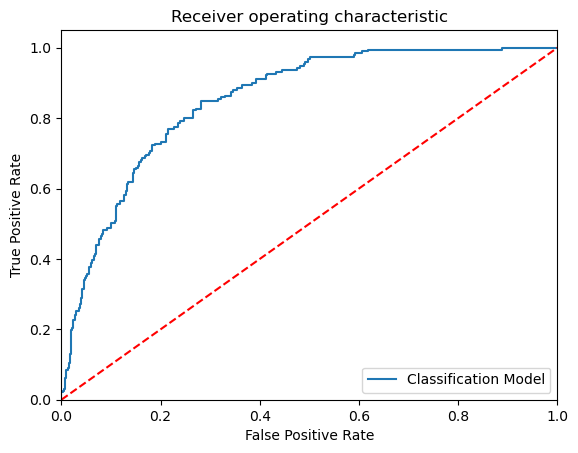

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 123   68]
 [  84 1323]]
Outcome values : 
 123 68 84 1323
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.64      0.62       191
           0       0.95      0.94      0.95      1407

    accuracy                           0.90      1598
   macro avg       0.77      0.79      0.78      1598
weighted avg       0.91      0.90      0.91      1598

Accuracy : 90.5 %
Precision : 59.4 %
Recall : 64.4 %
F1 Score : 0.618
Specificity or True Negative Rate : 94.0 %
Balanced Accuracy : 79.2 %
MCC : 0.564
roc_auc_score: 0.792


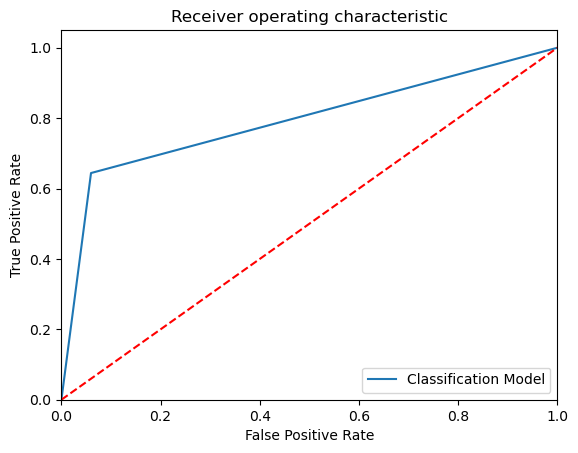

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 137   54]
 [  15 1392]]
Outcome values : 
 137 54 15 1392
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.72      0.80       191
           0       0.96      0.99      0.98      1407

    accuracy                           0.96      1598
   macro avg       0.93      0.85      0.89      1598
weighted avg       0.96      0.96      0.95      1598

Accuracy : 95.7 %
Precision : 90.1 %
Recall : 71.7 %
F1 Score : 0.799
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 85.3 %
MCC : 0.781
roc_auc_score: 0.853


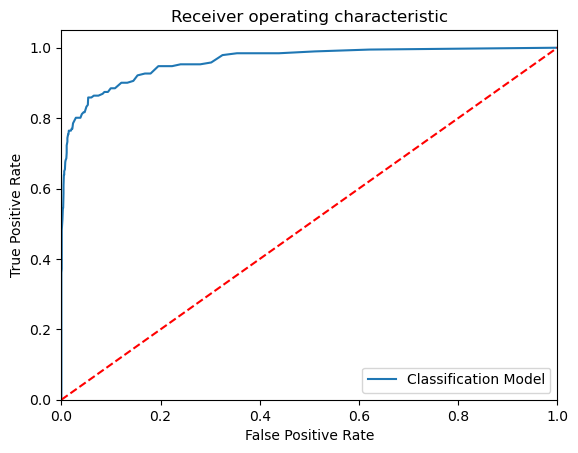

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 148   43]
 [  18 1389]]
Outcome values : 
 148 43 18 1389
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.77      0.83       191
           0       0.97      0.99      0.98      1407

    accuracy                           0.96      1598
   macro avg       0.93      0.88      0.90      1598
weighted avg       0.96      0.96      0.96      1598

Accuracy : 96.2 %
Precision : 89.2 %
Recall : 77.5 %
F1 Score : 0.829
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 88.1 %
MCC : 0.81
roc_auc_score: 0.881


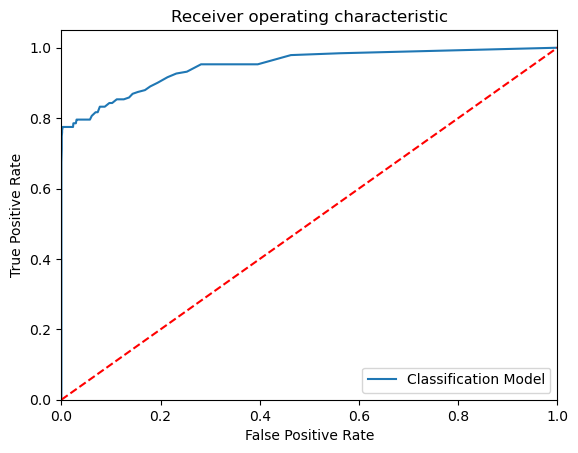

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 152   39]
 [  73 1334]]
Outcome values : 
 152 39 73 1334
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.80      0.73       191
           0       0.97      0.95      0.96      1407

    accuracy                           0.93      1598
   macro avg       0.82      0.87      0.85      1598
weighted avg       0.94      0.93      0.93      1598

Accuracy : 93.0 %
Precision : 67.6 %
Recall : 79.6 %
F1 Score : 0.731
Specificity or True Negative Rate : 94.8 %
Balanced Accuracy : 87.2 %
MCC : 0.694
roc_auc_score: 0.872


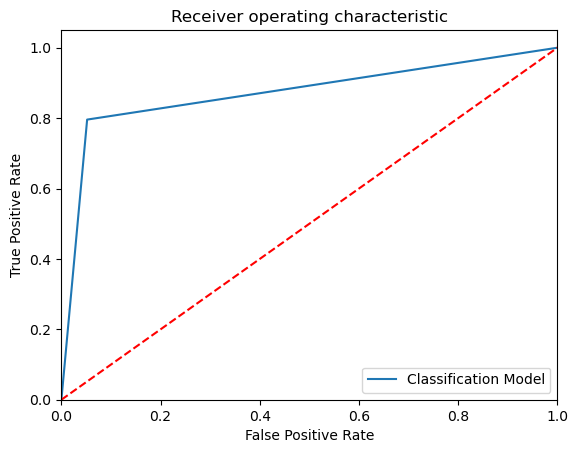

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  92   99]
 [ 193 1214]]
Outcome values : 
 92 99 193 1214
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.48      0.39       191
           0       0.92      0.86      0.89      1407

    accuracy                           0.82      1598
   macro avg       0.62      0.67      0.64      1598
weighted avg       0.85      0.82      0.83      1598

Accuracy : 81.7 %
Precision : 32.3 %
Recall : 48.2 %
F1 Score : 0.387
Specificity or True Negative Rate : 86.3 %
Balanced Accuracy : 67.2 %
MCC : 0.292
roc_auc_score: 0.672


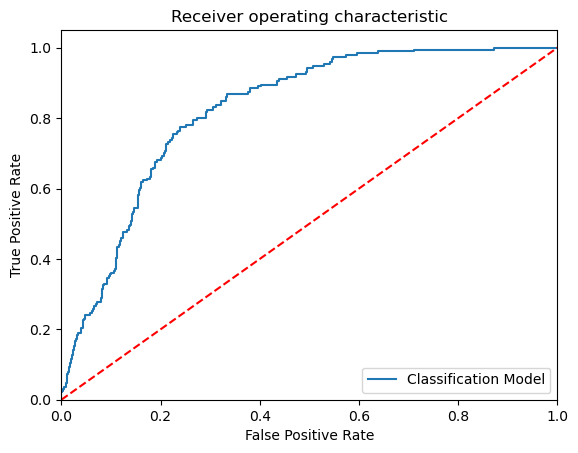

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)
Confusion matrix : 
 [[ 154   37]
 [ 379 1028]]
Outcome values : 
 154 37 379 1028
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.81      0.43       191
           0       0.97      0.73      0.83      1407

    accuracy                           0.74      1598
   macro avg       0.63      0.77      0.63      1598
weighted avg       0.88      0.74      0.78      1598

Accuracy : 74.0 %
Precision : 28.9 %
Recall : 80.6 %
F1 Score : 0.425
Specificity or True Negative Rate : 73.1 %
Balanced Accuracy : 76.8 %
MCC : 0.369
roc_auc_score: 0.768


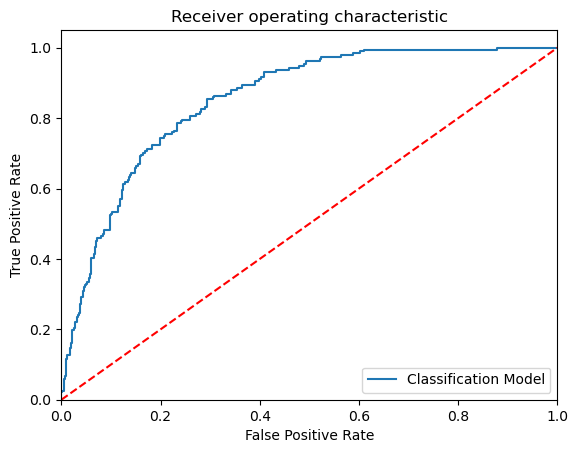

-----------------------------------------------------------------------------------------------------


In [79]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='linear', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}

    new_row_df = pd.DataFrame([new_row])
    
    # Concatenate the new row with the existing DataFrame
    EMResults = pd.concat([EMResults, new_row_df], ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>


In [80]:
#Display the comparison results
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),12,179,10,1397,0.882,0.545,0.063,0.113,0.993,0.155,0.527860,0.528
1,DecisionTreeClassifier(),123,68,84,1323,0.905,0.594,0.644,0.618,0.940,0.564,0.792139,0.792
2,"(DecisionTreeClassifier(max_features='sqrt', r...",137,54,15,1392,0.957,0.901,0.717,0.799,0.989,0.781,0.853308,0.853
3,"(ExtraTreeClassifier(random_state=1392354498),...",148,43,18,1389,0.962,0.892,0.775,0.829,0.987,0.810,0.881038,0.881
4,KNeighborsClassifier(n_neighbors=1),152,39,73,1334,0.930,0.676,0.796,0.731,0.948,0.694,0.871964,0.872
5,GaussianNB(),92,99,193,1214,0.817,0.323,0.482,0.387,0.863,0.292,0.672252,0.672
6,"SVC(class_weight='balanced', kernel='linear', ...",154,37,379,1028,0.740,0.289,0.806,0.425,0.731,0.369,0.768458,0.768


In [81]:
# Assuming you have also predicted using ExtraTreesClassifier(Model ET)
# Since having more accuracy we have choosen it for prediction
y_pred=ModelET.predict(x_test)

In [83]:
# Display the Final results by merging duplicate file

Results=pd.DataFrame({'stroke_A':y_test,'stroke_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal=bsdata_bk.merge(Results,left_index=True,right_index=True)

#Display 10 records randomly

ResultsFinal.sample(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_A,stroke_P
1617,Female,45.0,0,0,Yes,Private,Rural,176.48,24.0,formerly smoked,0,0,0
712,Female,69.0,0,1,Yes,Private,Rural,254.60,21.7,Unknown,0,0,0
1832,Male,18.0,0,0,No,Private,Urban,113.24,24.9,Unknown,0,0,0
952,Female,24.0,0,0,Yes,Private,Rural,84.08,24.5,Unknown,0,0,0
3229,Male,14.0,0,0,No,children,Urban,74.54,25.2,Unknown,0,0,0
848,Male,40.0,0,0,Yes,Private,Urban,78.11,35.3,never smoked,0,0,0
14,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1,1,1
627,Female,12.0,0,0,No,children,Rural,90.58,19.2,Unknown,0,0,0
4331,Male,72.0,1,1,Yes,Private,Rural,60.98,34.9,formerly smoked,0,0,0
4144,Female,73.0,1,0,Yes,Self-employed,Rural,124.78,35.6,never smoked,0,0,0


In [84]:
# Display the Final results by data frame 

Results = pd.DataFrame({ 'stroke_A':y_test, 'stroke_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = pd.DataFrame({'stroke_A': y_test, 'stroke_P': y_pred})

#Display 10 records randomly 
ResultsFinal.sample(10)

,stroke_A,stroke_P
3883,0,0
2213,0,0
5124,1,1
4198,0,0
2384,0,0
5054,1,1
1487,0,0
5323,1,1
4346,0,0
4456,0,0



Boosting

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42